import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

import seaborn as sns
# Reset default params
sns.set()

# Set context to `"paper"`
sns.set_context("paper")
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# Use Matplotlib defaults
plt.style.use("seaborn")

# import the ML algorithm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [3]:
# Check the available styles
# plt.style.available

In [2]:
location = r"C:\Users\User\Desktop\Machine Learning\ML_dataset\datasets\birth-data.csv"


In [3]:
df = pd.read_csv(location)


In [5]:
df.head()

,Case_No,Grams,Weeks,Smoke
0,1,3147,40,0
1,2,2977,41,0
2,3,3119,38,0
3,4,3487,38,0
4,5,4111,39,0


In [6]:
df.shape

(100, 4)

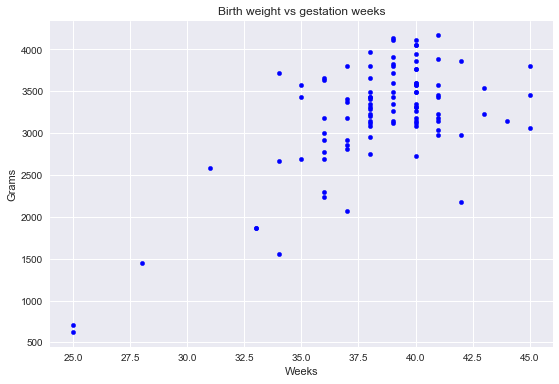

In [7]:
ax = df.plot(kind='scatter', 
        x='Weeks', 
        y='Grams', 
        figsize=(9,6),
        title= 'Birth weight vs gestation weeks',
        grid=True,
        legend=True,
        color='blue',
        marker='o',

       );
# Set the x-axis label
ax.set_xlabel("Weeks")

# Set the y-axis label
ax.set_ylabel("Grams");

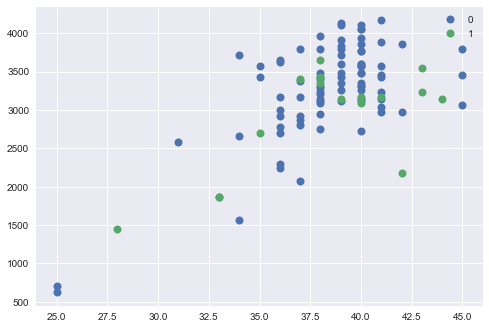

In [9]:
groups = df.groupby('Smoke')

# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Weeks, group.Grams, marker='o', linestyle='', ms=8, label=name)
    
ax.legend();


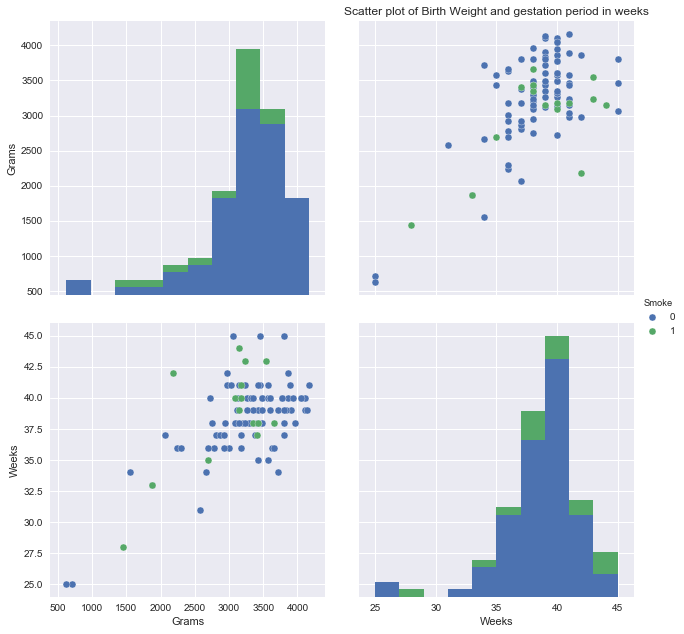

In [10]:
# pair plots
sns.pairplot(data=df, vars=['Grams', 'Weeks'], hue='Smoke', size=4.5); diag_kind="hist"

plt.title("Scatter plot of Birth Weight and gestation period in weeks");

In [11]:
df.corr()

,Case_No,Grams,Weeks,Smoke
Case_No,1.000000,-0.003990,-0.094200,0.002425
Grams,-0.003990,1.000000,0.655948,-0.160340
Weeks,-0.094200,0.655948,1.000000,0.030193
Smoke,0.002425,-0.160340,0.030193,1.000000


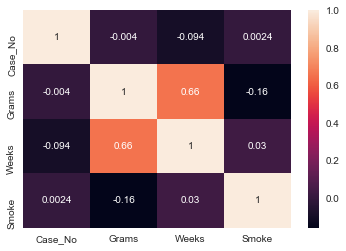

In [9]:
sns.heatmap( df.corr(), annot=True );

In [10]:
# create a Python list of feature names
feature_cols = ['Weeks', 'Smoke']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['Grams']

In [18]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [19]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(70, 2)
(70,)
(30, 2)
(30,)


In [20]:
X.shape

(100, 2)

In [21]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)

y-intercept             :  -1676.287139357073
beta coefficients       :  [ 128.85858362 -328.52085498]


the multiple regression equation is

$$ \hat{y}_y = \hat{\beta}_0 + \hat{\beta}_1X_{1j} + \hat{\beta}_2X_{2j}$$

$$ \hat{y}_y = -1676 + 128X_{1j} - 328X_{2j}$$

To observe the effect on this equation when we wish to consider only
the births to __smoking__ mothers, we let $X_{2j} = 1$

The equation then becomes

$$ \hat{y}_y = -1676 + 128X_{1j} - 328(1) = -2004 + 128X_{1j}  $$

which has a y -intercept -1909 of and a slope of 128

Note that the y-intercept for the new equation is equal to $ \hat{\beta}_0 + \hat{\beta}_2 $


Now let us consider only births to __nonsmoking__ mothers. When we let $X_2 = 0 $, 
our regression equation reduces to

$$ \hat{y}_j = -1676 + 128x_{1j} - 328(0) = -1676 + 128x_{1j} $$

In [19]:
linreg.intercept_, linreg.coef_

(-1676.287139357073, array([ 128.85858362, -328.52085498]))

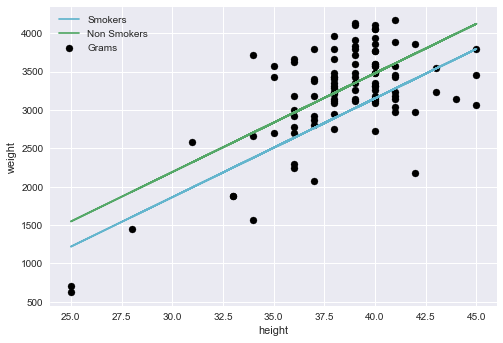

In [21]:
plt.scatter(X['Weeks'], y, color='black')

# for smokers
predicted_values = [(linreg.intercept_ + linreg.coef_[0] * week - 328)  for week in X['Weeks']]
plt.plot(X['Weeks'], predicted_values, 'c', label='Smokers')

# for Non smokers
predicted_values = [(linreg.intercept_ + linreg.coef_[0] * week )  for week in X['Weeks']]
plt.plot(X['Weeks'], predicted_values, 'g', label='Non Smokers')

plt.xlabel("height")
plt.ylabel("weight")
plt.legend();

- The slopes of the equations are the same 
- but the y-intercepts are different. 
- The y-intercept for the equation associated with nonsmoking mothers is larger than the one for the smoking mothers

- These results show that for this sample, babies born to __mothers who do not smoke__ weighed, on the average, __more__ than babies born to mothers who do smoke, when length of gestation is taken into account.

- The amount of the difference, on the average, is 328 grams (coef of $X_2$)

> Objective : we wish to know if the sample difference of 328 grams is significant. In other words,
__does smoking have an effect on birth weight__?

#### Carry out hypothesis testing

1. __Data__. The data are as given in the table

2. __Assumptions__. We presume that the assumptions underlying multiple regression analysis are met.

3. __Hypotheses__. $H_0: \beta_2 = 0; H_a: \beta_2 \neq 0  $ Suppose we let $\alpha$ = .05

4. __Test statistic__. The test statistic is $ t = (\hat{\beta_2} - 0)/s_\hat{\beta_2}$

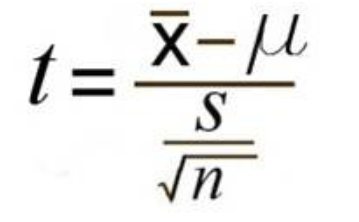

5. __Distribution of test statistic__. When the assumptions are met and is true the test statistic is distributed as Student’s t with 97 degrees of freedom.

6. __Decision rule__. We reject if the computed t is either greater than or equal to 1.9848 or less than or equal to -1.9848 (obtained by interpolation).

In [22]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Grams   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2075.
Date:                Sat, 22 Dec 2018   Prob (F-statistic):           6.08e-81
Time:                        11:55:20   Log-Likelihood:                -763.06
No. Observations:                 100   AIC:                             1530.
Df Residuals:                      98   BIC:                             1535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weeks         85.4985      1.419     60.246      0.0

7. Calculation of test statistic. The calculated value of the test statistic is -2.347
8. Statistical decision. Since -2.347 < -1.9848, we reject $H_0$

9. Conclusion. We conclude that, in the sampled population, whether the mothers smoke is associated with a reduction in the birth weights of their babies.
10. p value. For this test 0.021. 